<a href="https://colab.research.google.com/github/wauchi/simpson-facial-recognition/blob/master/simpson_facial_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --no-cache-dir -qq

In [ ]:
import fastai

In [ ]:
fastai.__version__

'1.0.61'

In [ ]:
import warnings;
warnings.filterwarnings('ignore');

In [ ]:
from fastai.vision import *
from fastai.widgets import *

from google.colab import drive

import tarfile

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path('')

In [ ]:
path.ls()

[PosixPath('.config'), PosixPath('drive'), PosixPath('sample_data')]

In [ ]:
tarfile.open(path/'drive/My Drive/Colab Notebooks/datasets/simpsons_dataset.tar.gz', 'r:gz').extractall(path)

In [ ]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid_pct=0.2, size=224)

ImageDataBunch;

Train: LabelList (33493 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
selma_bouvier,selma_bouvier,selma_bouvier,selma_bouvier,selma_bouvier
Path: .;

Valid: LabelList (8373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
selma_bouvier,moe_szyslak,milhouse_van_houten,homer_simpson,chief_wiggum
Path: .;

Test: None

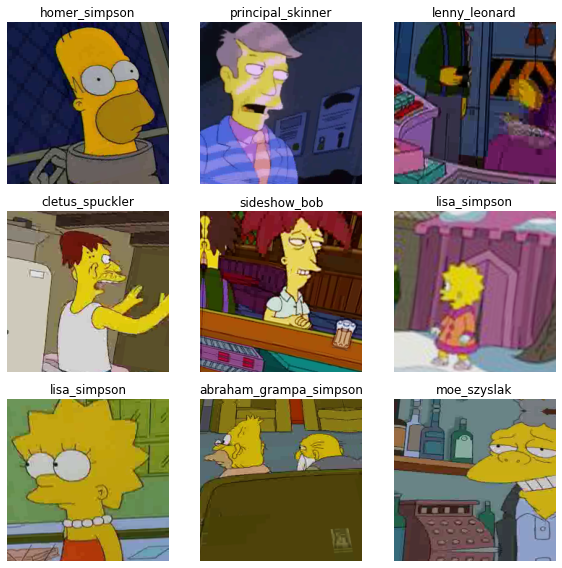

In [ ]:
data.show_batch(rows=3, figsize=(8, 8)) 

In [ ]:
print(data.classes)

['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers']


# Loading Pretrainedmodel
We load a ResNet34 model, which is a convolutional neural network with 34 layers. There are also larger networks with up to 150 layers but this model usually takes the least effort to train a get good results. Furthermore, we also specifiy that we want to monitor the accuracy during training.


In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


## Find the optimal learning rate


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


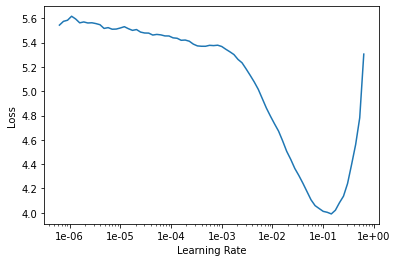

In [ ]:
learn.lr_find()
learn.recorder.plot()

## Train the head of the network


In [ ]:
learn.fit_one_cycle(cyc_len=3, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.754799,0.624786,0.844978,3:13:09
1,0.404325,0.216501,0.942553,3:13:01
2,0.248287,0.128080,0.968948,3:12:40


## Save model

In [ ]:
learn.save('tmp-fit-head', path/'drive/My Drive/Colab Notebooks/datasets/')
#learn.export(file = path/'drive/My Drive/Colab Notebooks/datasets/export2.pkl')

PosixPath('models/tmp-fit-head.pth')

## Load model


In [ ]:
learn.load('/content/drive/My Drive/Colab Notebooks/datasets/models/tmp-fit-head')

Learner(data=ImageDataBunch;

Train: LabelList (33493 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
otto_mann,otto_mann,otto_mann,otto_mann,otto_mann
Path: .;

Valid: LabelList (8373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
krusty_the_clown,milhouse_van_houten,waylon_smithers,bart_simpson,sideshow_bob
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(

In [ ]:
len(learn.layer_groups)

3

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


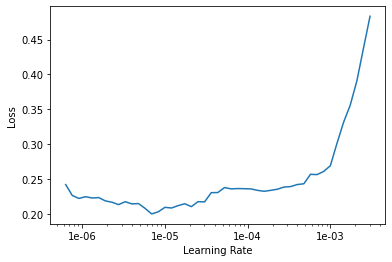

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.209469,0.100155,0.977308,4:13:42
1,0.188005,0.095166,0.978025,4:19:26


In [ ]:
learn.save('/content/drive/My Drive/Colab Notebooks/datasets/models/tmp-fit-all')

In [ ]:
learn.load('/content/drive/My Drive/Colab Notebooks/datasets/models/tmp-fit-all')

Learner(data=ImageDataBunch;

Train: LabelList (33493 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
selma_bouvier,selma_bouvier,selma_bouvier,selma_bouvier,selma_bouvier
Path: .;

Valid: LabelList (8373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
nelson_muntz,moe_szyslak,homer_simpson,charles_montgomery_burns,ned_flanders
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (

In [ ]:
import pickle

In [ ]:
with open("model.bin", 'wb') as out:
    pickle.dump(learn, out)
    out.close()

In [ ]:
img = open_image('/content/simpsons_dataset/chief_wiggum/pic_0000.jpg').resize(224)

In [ ]:
pred = learn.predict(img)

In [ ]:
pred

(Category tensor(7),
 tensor(7),
 tensor([7.2712e-08, 1.5496e-07, 9.0704e-08, 6.7494e-08, 3.5098e-06, 4.4746e-08,
         2.9388e-06, 9.9991e-01, 3.5425e-07, 1.8644e-05, 2.7356e-09, 3.5000e-09,
         6.8789e-06, 4.2199e-07, 4.9592e-08, 4.1815e-06, 1.9741e-07, 1.8916e-07,
         5.1139e-08, 2.4206e-08, 1.1310e-06, 7.0512e-08, 8.1390e-07, 2.1111e-07,
         1.0602e-05, 6.0866e-07, 5.6764e-10, 2.9864e-05, 2.6386e-08, 3.3665e-06,
         8.9800e-07, 5.5693e-09, 8.5341e-07, 3.7358e-09, 3.2488e-06, 1.9053e-07,
         1.1846e-08, 1.0743e-07, 2.4269e-08, 4.7097e-07, 4.6230e-08, 1.0182e-08]))

In [ ]:
learn.data.classes[7]

'chief_wiggum'

In [ ]:
learn.export()

NameError: ignored